# Dask DataFrame

Материалы: 
* Макрушин С.В. Лекция 13: Dask DataFrame
* https://docs.dask.org/en/latest/dataframe.html
* Jesse C. Daniel. Data Science with Python and Dask. 

## Задачи для совместного разбора

1. Считать данные из файлов в каталоге `accounts`. Содержат ли какие-либо из столбцов пропуски?

2. Подсчитать количество раз, которое то или иное имя встретилось в выборке. Вывести самое часто встречающееся имя.

3. Создать новую колонку, которая является результатом от деления значения `amount` нацело на 100, если `amount` > 100, и нулём в противном случае.

## Лабораторная работа 13

__При решении данных задач не подразумевается использования других коллекций, кроме `dask.DataFrame`, если в задании явно не указано обратное.__

In [1]:
import dask.dataframe as dd
import pandas as pd
import dask.bag as db
import json
import dask

In [35]:
!pip install graphviz

     |████████████████████████████████| 46 kB 689 kB/s eta 0:00:01


1. В архиве `recipes_full.zip` находятся файлы, содержащие информацию об рецептах блюд. Загрузите данные из файлов этого архива в виде `dd.DataFrame` с названием `recipes`. Укажите, что в столбце `submitted` содержатся даты.

In [22]:
recipes_df = dd.read_csv('data/13_dask_dataframe_data/recipes_full/recipes_full_*.csv',
                      parse_dates=['submitted'],
                      dtype={'minutes': 'float64',
                               'n_steps': 'float64'}
                     )

2. Выведите метаинформацию о таблице: `npartitions` и типы столбцов.

In [23]:
recipes_df.npartitions

16

In [24]:
recipes_df.dtypes

id                         int64
name                      object
minutes                  float64
contributor_id             int64
submitted         datetime64[ns]
n_steps                  float64
description               object
n_ingredients              int64
dtype: object

3. Выведите на экран 5 первых строк таблицы. Выведите на экран 5 последних строк таблицы. В случае сообщения об ошибки объясните причину и исправьте ошибку.

In [25]:
recipes_df.head()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970,vant ivoire mickies nothing,33.0,803776,2019-08-22,4.0,pat and gina neely and their family own and op...,9
1,1089012,kremsils mariposa baccala cookies class borage...,23.0,51579,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5
2,1428572,tania lander,0.0,68884,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5
3,1400250,heloise milli asher doogh zojirushi,24.0,678862,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1
4,387709,nutty chocolate chunk cookies,47.0,489552,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10


In [26]:
recipes_df.tail()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
44011,1029131,tuti waffle snackies steakhouse,19.0,171345,1973-10-18,4.0,"according to a providence journal article, ama...",4
44012,1700703,noelias cheats crocante fleisch zitumbuwa,1.0,30228,2007-07-01,6.0,if possible sauté the onions and garlic in abo...,1
44013,1910650,rubbed restuffed pelmeni bedouin flavourful,60.0,591905,2009-09-26,3.0,another great recipe to add to the growing swe...,2
44014,713836,stems polpettine peezi,NaN,357389,2003-09-30,4.0,adapted from top secret recipes. love this!,9
44015,660699,clementines,64.0,29196,1973-06-03,6.0,this would make a great start to your holiday ...,8


4. Посчитайте, сколько строк содержит каждый из блоков (partitions).

In [29]:
recipes_df.map_partitions(lambda item: item['name'].count()).compute()

0     237503
1      41449
2     235221
3      43732
4     238138
5      40816
6     234750
7      44205
8     237886
9      41068
10    234486
11     44468
12    238298
13     40655
14    234935
15     44015
dtype: int64

5. Найдите максимум в столбце `n_steps`. Визуализируйте граф вычислений для этой задачи. Прокомментируйте логику работы `dask` при решении данной задачи.

In [32]:
n_steps_max = recipes_df['n_steps'].max().compute()
n_steps_max

145.0

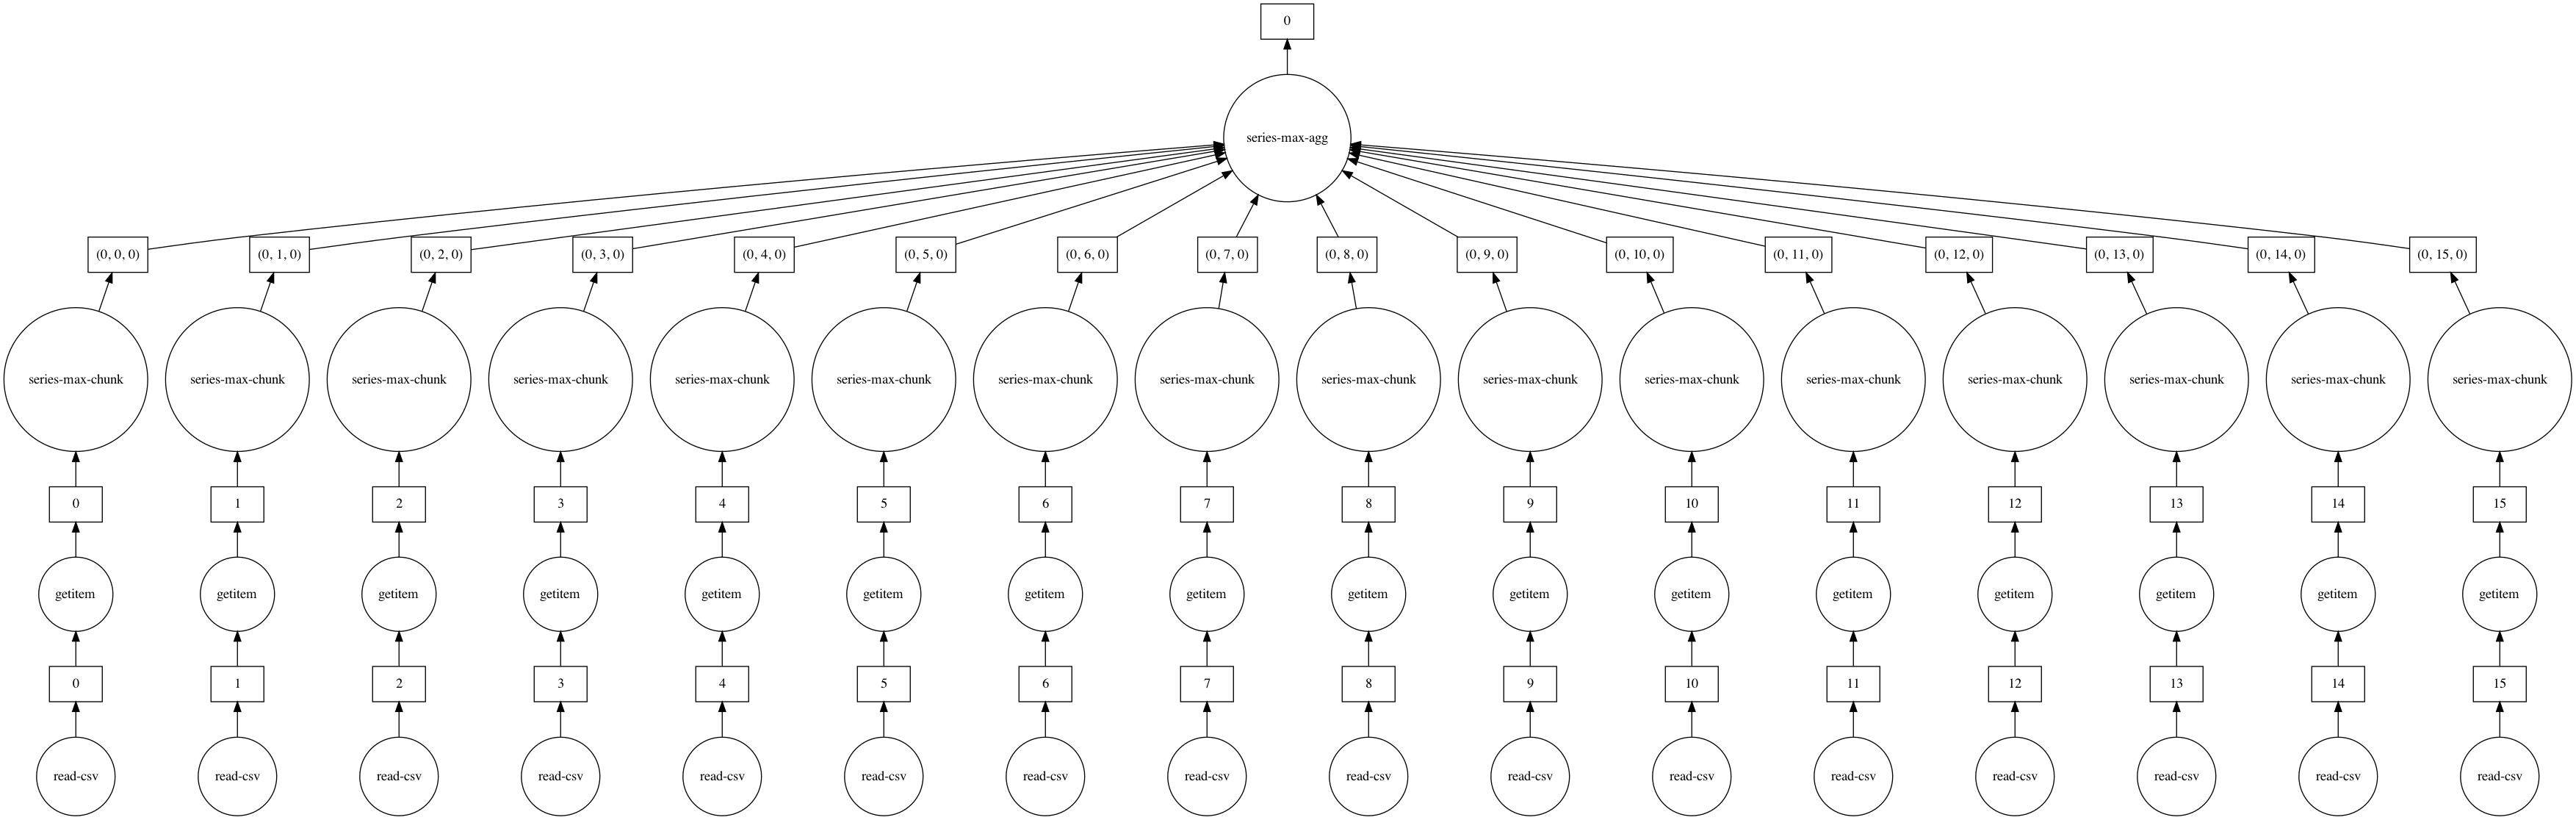

In [38]:
recipes_df['n_steps'].max().visualize()

6. Посчитайте количество рецептов с группировкой по месяцам добавления отзыва в базу.

In [43]:
recipes_grouped = recipes_df['submitted'].groupby(recipes_df['submitted'].dt.month).count().compute()
recipes_grouped

submitted
1     193363
2     173834
3     192389
4     186049
5     192487
6     184205
7     189337
8     187276
9     181081
10    187018
11    180974
12    183624
Name: submitted, dtype: int64

7. Считайте файлы из архива `reviews_full.zip` (__ЛР12__) в виде `dask.bag`. Пользуясь результатом лабораторной работы 12, рассчитайте среднее значение оценок отзывов с группировкой по месяцам. После завершения всех вычислений преобразуйте результат к `pd.Series`.

8. Пользуясь результатами решения задач 6 и 7, создайте `pd.DataFrame`, содержащий два столбца: `mean_rating`, `recipes_count`